# Assignment A4

### Name: Rutuja Kawade         
### Class: TE-2       
### Roll No: 31229

### Problem Statement
Download Abalone dataset. (URL:
http://archive.ics.uci.edu/ml/datasets/Abalone)

a) Load the data from data file

b) Explore the shape of dataset

c) Summarize the properties in the training dataset.

d) Check the dataset for any missing values, impute the missing
values and also print out the correlation matrix.

e) Split data into train, test sets

f) Predict the age of abalone from physical measurements using
linear regression.

g) Plot scatterplot of real data points and regression line.

h) Display the coefficients & intercept
,accuracy score,Mean Squared Error (MSE) and RMSE.

In [180]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [181]:
features =  ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight'\
           ,'Shell weight','Rings']
df = pd.read_csv('abalone.data',names=features)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [183]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [184]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [185]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

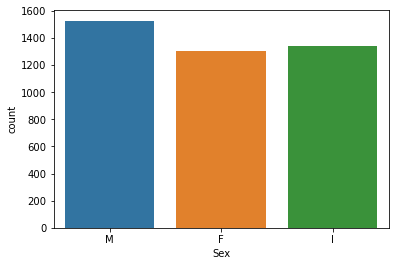

In [186]:
'''Sex Count of Abalone, M - Male, F - Female, I - Infant'''
sns.countplot(x='Sex', data = df)

<AxesSubplot:xlabel='Rings', ylabel='Count'>

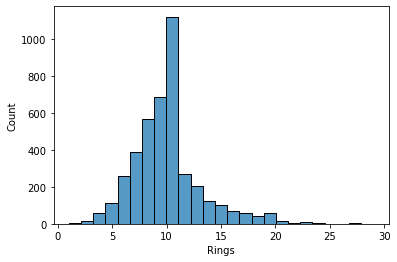

In [187]:
sns.histplot(data=df,x='Rings',bins=25)

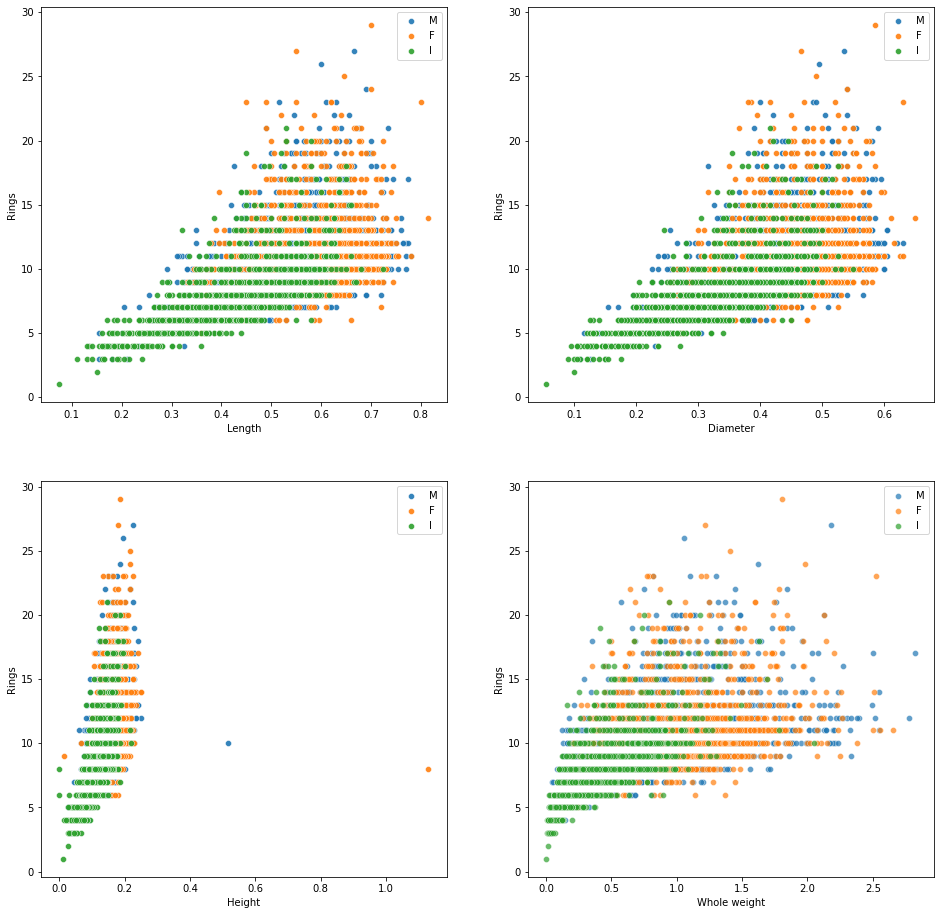

In [188]:
fig,axes = plt.subplots(2,2,figsize=(16,16))
g = sns.FacetGrid(df, hue="Sex")
g.map(sns.scatterplot, "Length", "Rings", alpha=.9,ax=axes[0][0])
g.map(sns.scatterplot, "Diameter", "Rings", alpha=.9,ax=axes[0][1])
g.map(sns.scatterplot, "Height", "Rings", alpha=.9,ax=axes[1][0])
g.map(sns.scatterplot, "Whole weight", "Rings", alpha=.7,ax=axes[1][1])
g.add_legend()
plt.close(2)


<AxesSubplot:xlabel='Whole weight', ylabel='Rings'>

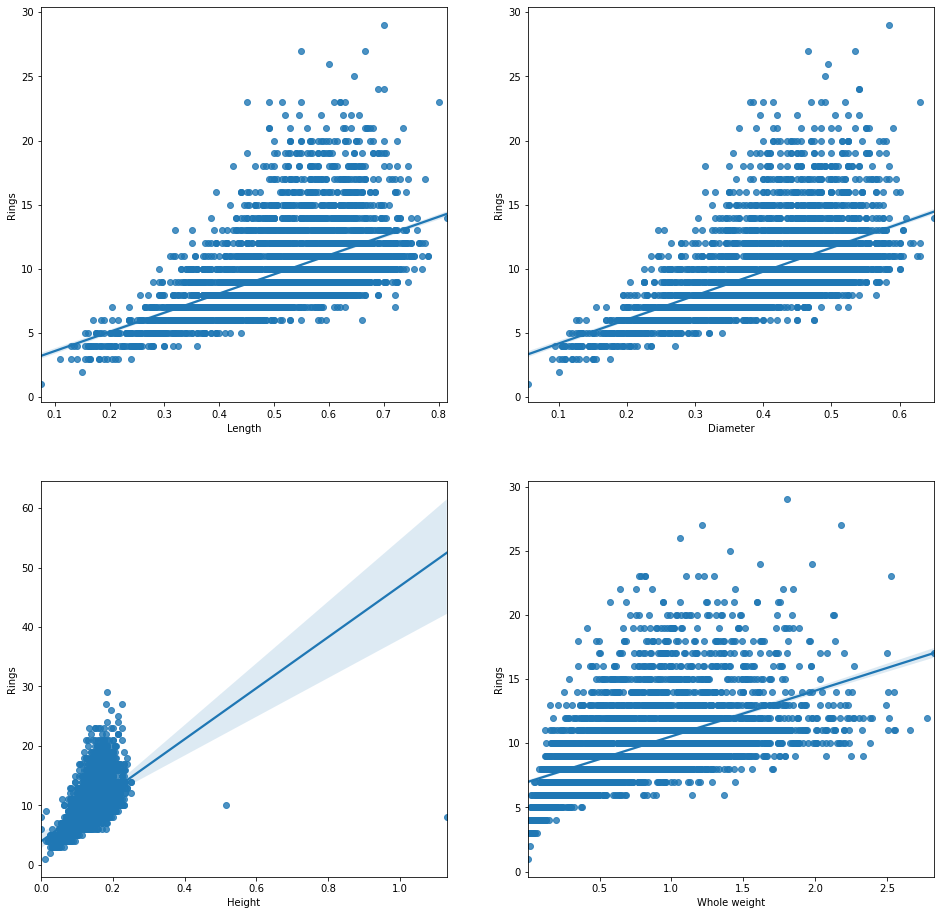

In [189]:

fig,axes = plt.subplots(2,2,figsize=(16,16))
sns.regplot(x='Length',y='Rings',data=df,ax=axes[0][0])
sns.regplot(x='Diameter',y='Rings',data=df,ax=axes[0][1])
sns.regplot(x='Height',y='Rings',data=df,ax=axes[1][0])
sns.regplot(x='Whole weight',y='Rings',data=df,ax=axes[1][1])

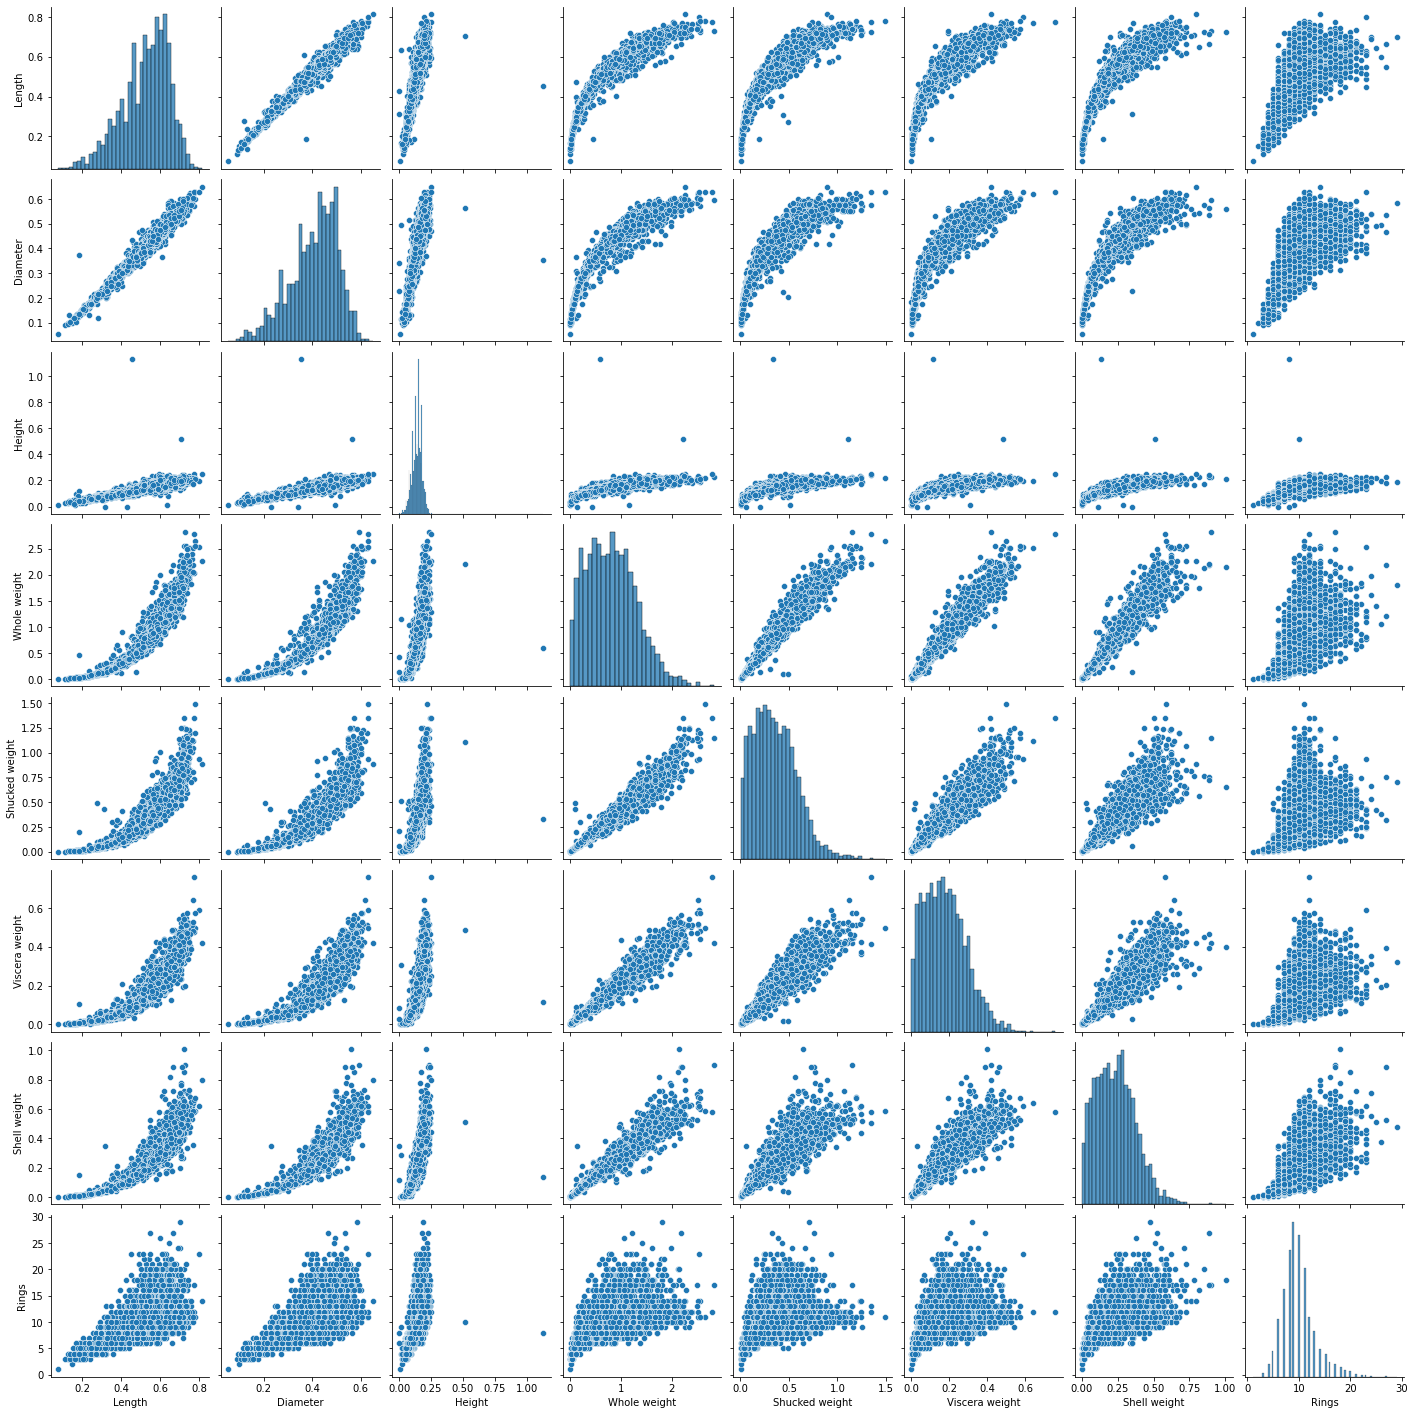

In [190]:
    sns.pairplot(df[features])

# Linear Regression Model

In [191]:
abalone = pd.get_dummies(df)

abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [192]:
#calculate and round off correlation matrix
corMat = (abalone.iloc[:,:8].corr()).values
corMat = np.around(corMat, decimals = 3)
##print(corMat)
#print correlation with 'Rings' feature
feature_importance = (abalone.iloc[:,:8].corr()).iloc[:-1, -1].sort_values(ascending=False)
print('Features in Descending Order of Importance', list(feature_importance.index))

df.head()

Features in Descending Order of Importance ['Shell weight', 'Diameter', 'Height', 'Length', 'Whole weight', 'Viscera weight', 'Shucked weight']


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [193]:
from sklearn.model_selection import train_test_split

from sklearn import metrics
y = abalone["Rings"]
X = abalone.drop(columns="Rings")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


In [194]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred

array([13.13627645,  6.76579802,  8.4190469 , ..., 10.41304686,
       12.16203284,  8.40219798])

In [195]:
model.score(X_train,y_train)

0.5293996100788535

In [196]:
model.score(X_test,y_test)

0.5492748900920337

In [197]:
# Initializing classifier with one-v-rest approach. random_state is # to ensure same results in every execution.
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(multi_class = 'ovr', random_state=3)
# training classifier
logr.fit(X_train, y_train)
# Evaluate the classifier
print(logr.score(X_test, y_test))



0.23930384336475707


In [198]:
# Initializing classifier. random_state is to ensure same results in every execution. max_depth is to specify number of splits
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0, max_depth = 3)
# training classifier
dt.fit(X_train, y_train)
# Evaluate the classifier
print(dt.score(X_test, y_test))



0.27483683828861494


In [199]:
'''LabelEnconding the Categorical Data'''
from sklearn.preprocessing import LabelEncoder
df['Sex'] = LabelEncoder().fit_transform(df['Sex'].tolist())

'''One Hot Encoding for Sex Feature '''
from sklearn.preprocessing import OneHotEncoder
transformed_sex_feature = OneHotEncoder().fit_transform(df['Sex'].values.reshape(-1,1)).toarray()
df_sex_encoded = pd.DataFrame(transformed_sex_feature, columns = ["Sex_"+str(int(i)) for i in range(transformed_sex_feature.shape[1])])
df = pd.concat([df, df_sex_encoded], axis=1)

df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_0,Sex_1,Sex_2
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0.0,0.0,1.0
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0.0,0.0,1.0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1.0,0.0,0.0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0.0,0.0,1.0
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0.0,1.0,0.0


# Simple Logistic Regression Model
No of Classes : 2
- 1 - Rings > 10
- 0 - Rings <= 10

In [200]:
#Creating New Target Variable 
df['newRings'] = np.where(df['Rings'] > 10,1,0)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_0,Sex_1,Sex_2,newRings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0.0,0.0,1.0,1
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0.0,0.0,1.0,0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1.0,0.0,0.0,0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0.0,0.0,1.0,0
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0.0,1.0,0.0,0


In [201]:
#Learning Features and Predicting Features
Xtrain = df.drop(['newRings','Rings','Sex'], axis = 1)
Ytrain = df['newRings']


In [202]:
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [203]:
#Creating Object of LogisticRegression

from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
#Learning from Training Set
logreg.fit(X_train, Y_train)
#Predicting for Training Set
Y_pred = logreg.predict(X_test)
result_acc = accuracy_score(Y_test,Y_pred)

In [204]:
result_acc

0.7715736040609137

In [205]:
print('MAE:',metrics.mean_absolute_error(Y_test,Y_pred))


MAE: 0.22842639593908629


In [206]:
print('MSE:',metrics.mean_squared_error(Y_test,Y_pred))

MSE: 0.22842639593908629


In [207]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

RMSE: 0.4779397409078746


In [208]:
print('R2 Score:',metrics.r2_score(Y_test,Y_pred))

R2 Score: -0.03206791355419947


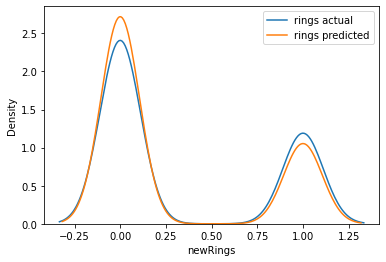

In [209]:
sns.kdeplot(Y_test,label='rings actual')
sns.kdeplot(Y_pred,label='rings predicted')
plt.legend()